In [1]:
import requests
req = requests.get("https://www.dataquest.io/wp-content/uploads/2020/11/ViewingActivity-sample.csv")
url_content = req.content
csv_file = open('downloaded.csv','wb')
csv_file.write(url_content)
csv_file.close()

In [43]:
import pandas as pd
df = pd.read_csv('downloaded.csv')


In [44]:
df.shape

(200, 10)

In [45]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [46]:
df = df.drop(['Profile Name','Attributes', 'Supplemental Video Type', 'Bookmark','Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title,Device Type
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,Mac


In [12]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [13]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [14]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('Asia/Kolkata')
df = df.reset_index()
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 10:47:53+05:30,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [15]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Asia/Kolkata]
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [16]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [17]:
office.shape

(137, 3)

In [18]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(130, 3)

In [19]:
office['Duration'].sum()

Timedelta('1 days 14:57:28')

In [20]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour
office.head(1)

,Start Time,Duration,Title,weekday,hour
10,2013-03-19 04:34:22+05:30,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,1,4


In [21]:
%matplotlib inline
import matplotlib

<AxesSubplot: title={'center': 'Office Episodes Watched by Day'}>

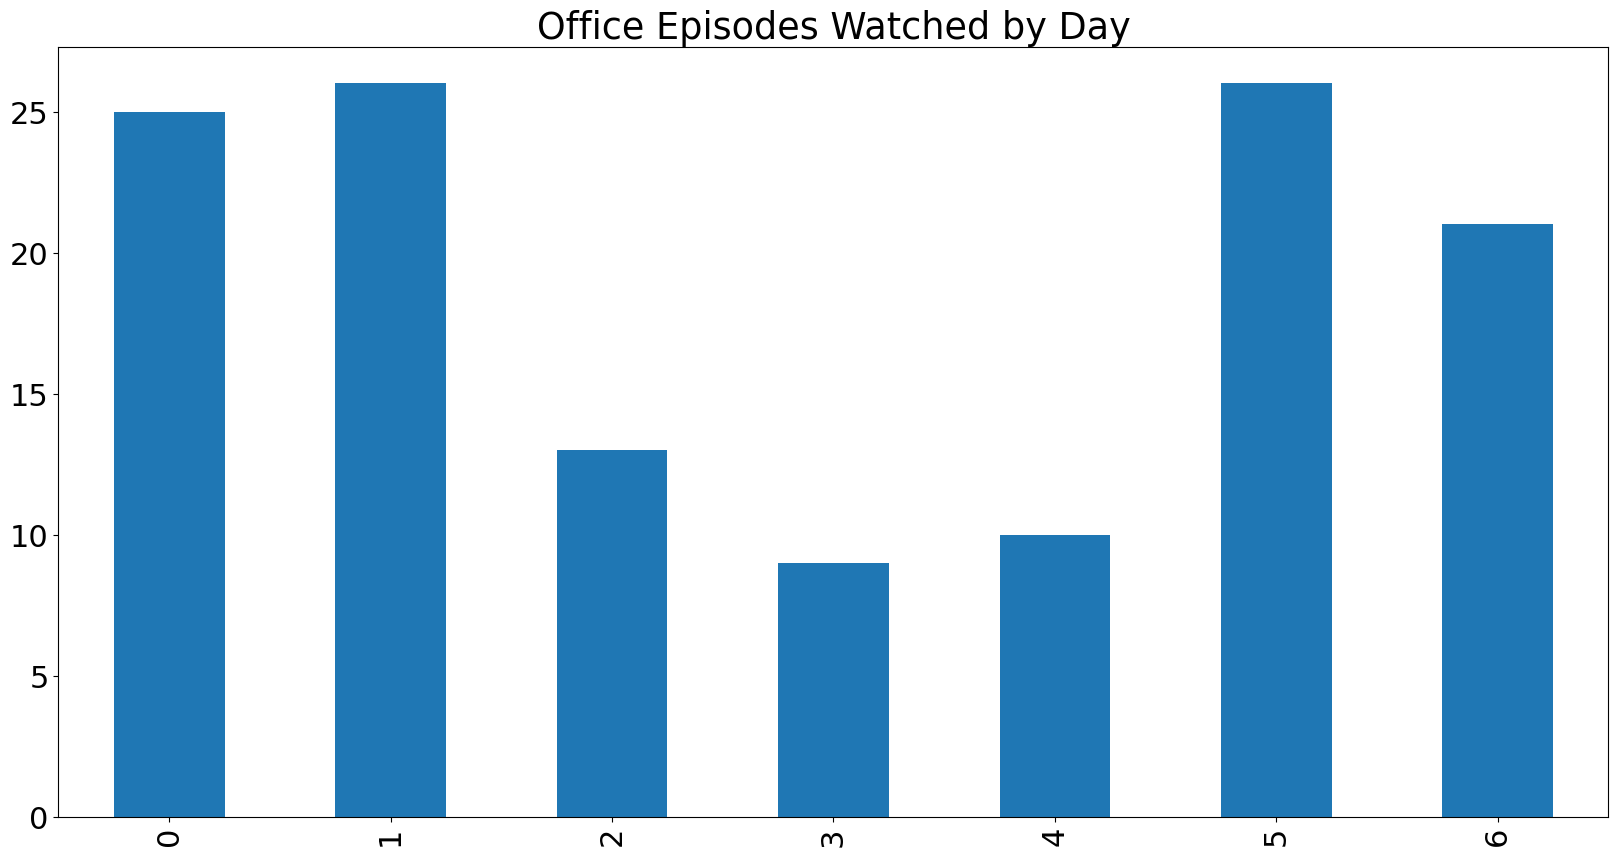

In [23]:
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)
office_by_day = office['weekday'].value_counts()
office_by_day = office_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

<AxesSubplot: title={'center': 'Office Episodes Watched by Hour'}>

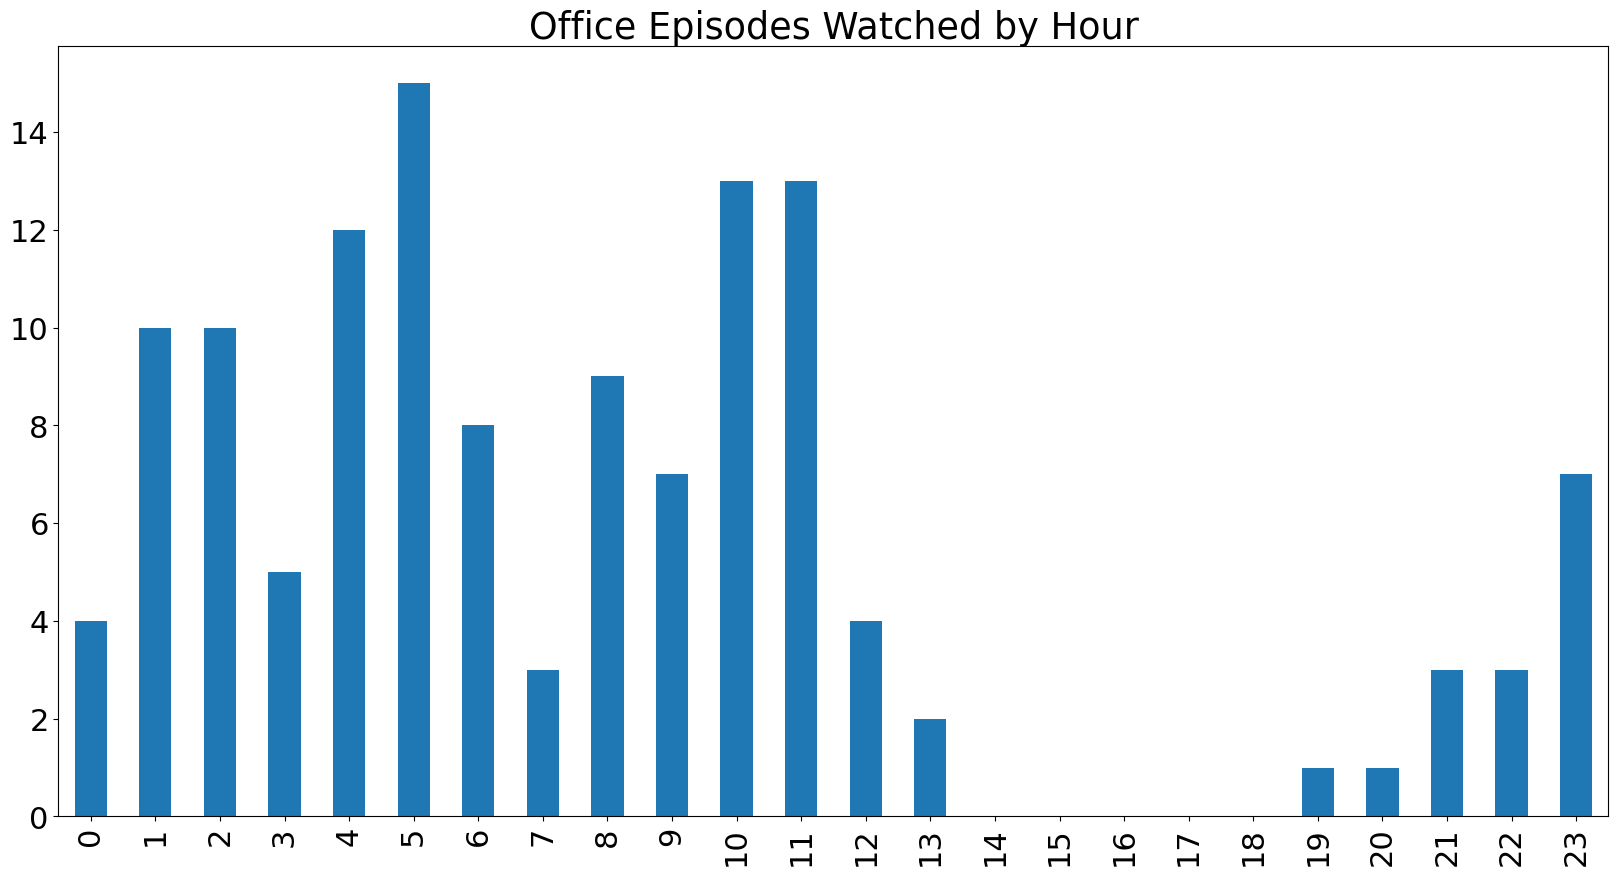

In [24]:
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)
office_by_hour = office['hour'].value_counts()
office_by_hour = office_by_hour.sort_index()
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')

In [33]:
invisible_war = df[df['Title'].str.contains('The Invisible War', regex=False)]


In [34]:
invisible_war['Duration'].sum()

Timedelta('0 days 00:53:05')

In [35]:
invisible_war['weekday'] = invisible_war['Start Time'].dt.weekday
invisible_war['hour'] = invisible_war['Start Time'].dt.hour
invisible_war.head(1)

/var/folders/xq/w5p7r5qn565cw616v0p9p8tc0000gn/T/ipykernel_13761/647368570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invisible_war['weekday'] = invisible_war['Start Time'].dt.weekday
/var/folders/xq/w5p7r5qn565cw616v0p9p8tc0000gn/T/ipykernel_13761/647368570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invisible_war['hour'] = invisible_war['Start Time'].dt.hour


,Start Time,Duration,Title,weekday,hour
3,2013-03-20 05:50:03+05:30,0 days 00:48:14,The Invisible War,2,5


/var/folders/xq/w5p7r5qn565cw616v0p9p8tc0000gn/T/ipykernel_13761/1050609618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invisible_war['weekday'] = pd.Categorical(invisible_war['weekday'], categories=


<AxesSubplot: title={'center': 'invisible_war Episodes Watched by Day'}>

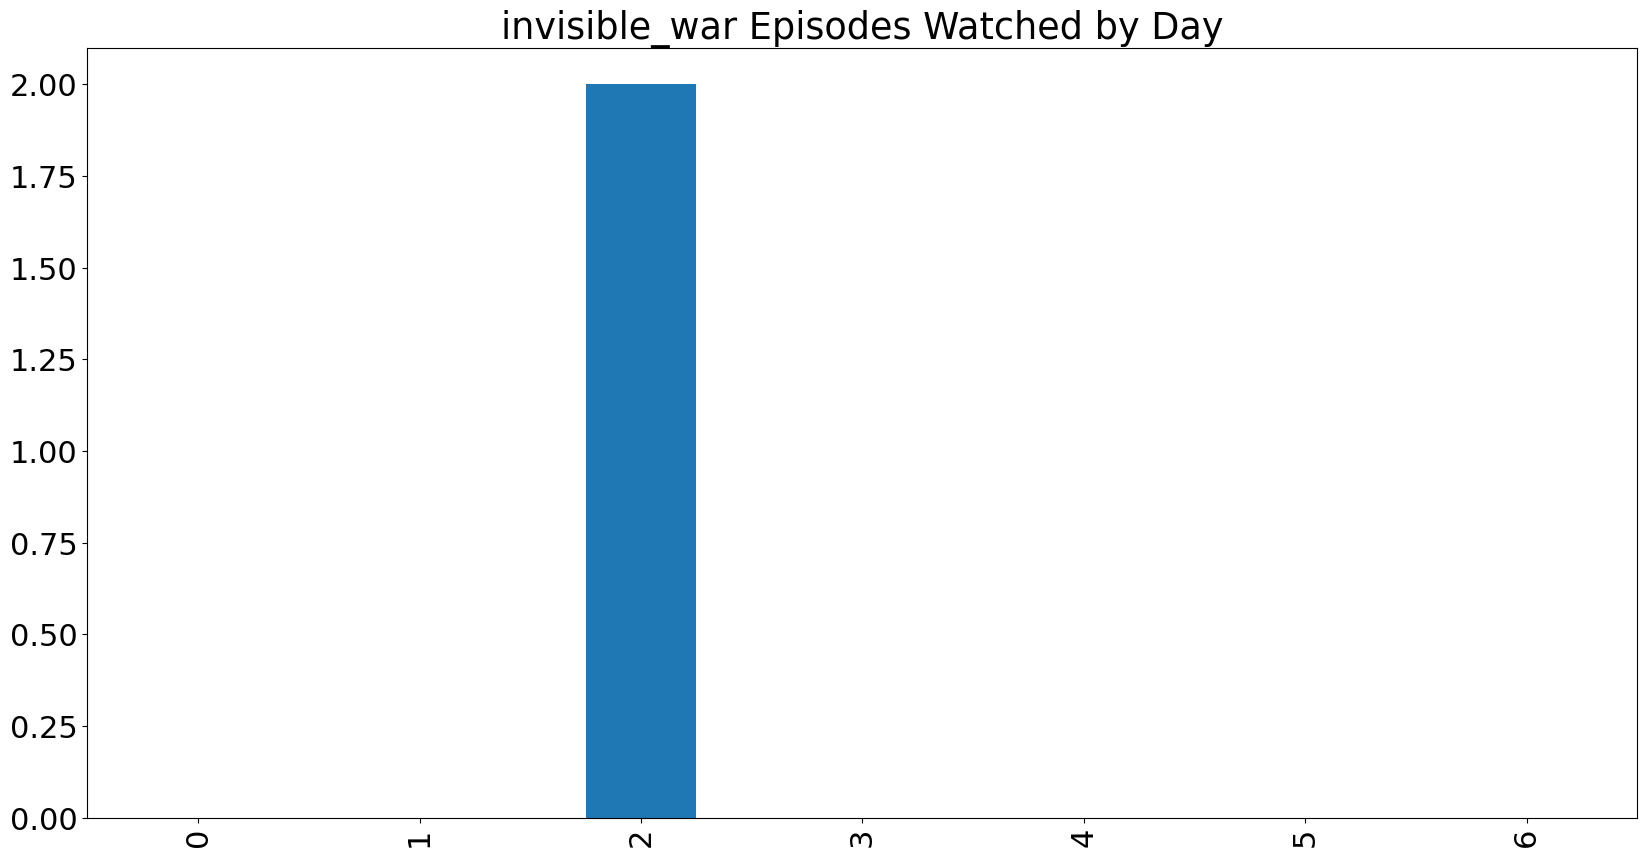

In [36]:
invisible_war['weekday'] = pd.Categorical(invisible_war['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)
invisible_war_by_day = invisible_war['weekday'].value_counts()
invisible_war_by_day = invisible_war_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
invisible_war_by_day.plot(kind='bar', figsize=(20,10), title='invisible_war Episodes Watched by Day')

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:

devices = list(df['Device Type'].unique())
device_count = list([df['Device Type'].str.count('Mac').sum(), df['Device Type'].str.count('Microsoft Xbox 360').sum(),df['Device Type'].str.count('Apple iPhone 5 with CDMA').sum()])
print(devices)
print(device_count)

['Mac', 'Microsoft Xbox 360', 'Apple iPhone 5 with CDMA']
[175, 18, 7]


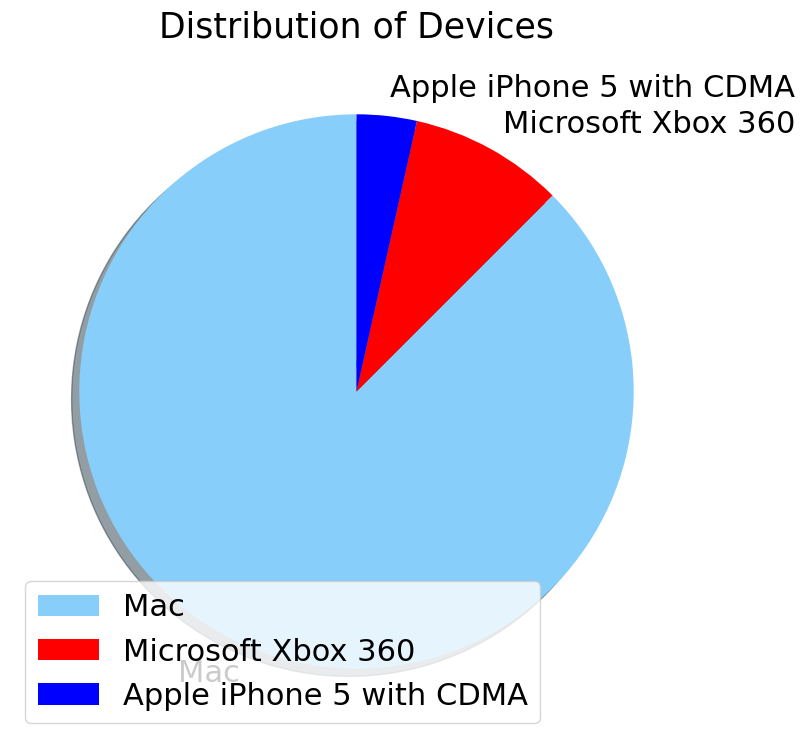

In [91]:
sizes = device_count
labels = devices
colors = ['lightskyblue', 'red', 'blue']
plt.pie(sizes,labels=list(labels), colors = colors, explode=None, shadow = True, startangle = 90)
plt.title('Distribution of Devices', fontsize = 25)
plt.legend()
plt.show()